In [1]:
# using direct closed form equation
import numpy as np
from IPython.display import display
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.17668757],
       [2.90836688]])

In [2]:
#now using batch gradient descent
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = (2/m)*X_b.T.dot((X_b.dot(theta)-y))
    theta = theta - eta * gradients
theta

array([[4.17668757],
       [2.90836688]])

In [3]:
#stochastic gradient descent
n_epochs = 50
t0,t1 = 5,50 #learning schedule params
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
theta

array([[4.14801648],
       [2.88319537]])

# POLYNOMIAL REGRESSION

In [4]:
from matplotlib import pyplot as plt
m=100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
#add a col of square of each existing features (here 1) to X
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.18701806]), array([[1.0019177 , 0.44902488]]))

# LEARNING CURVES

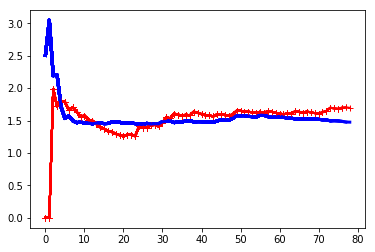

In [6]:
# increase data 1 at a time, compare result on validation and training set
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
        plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
        plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.show()

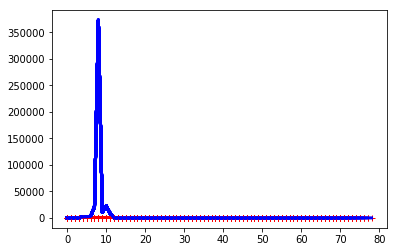

In [7]:
# now same with polynomial of 10th degree
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression()),
))
plot_learning_curves(polynomial_regression,X,y)
plt.show()

# RIDGE REGRESSION

In [8]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.07099434]])

In [9]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.27093717])

# LASSO REGRESSION

In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.03087839])

# ELASTIC NET

In [11]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.03137567])

# EARLY STOPPING

In [12]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
sgd_reg = SGDRegressor(n_iter=1,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_scaled = scaler.transform(X_train_poly,copy=True)
X_val_poly = poly_features.fit_transform(X_val)
scaler.fit(X_val_poly)
X_val_poly_scaled = scaler.transform(X_val_poly,copy=True)
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
best_epoch

465

# LOGISTIC REGRESSION

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'DESCR', 'feature_names', 'target_names']

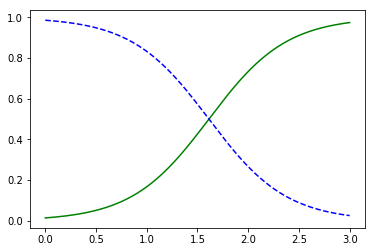

In [16]:
# only petal width feature
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.show()

# SOFTMAX REGRESSION

In [19]:
X = iris["data"][:,(2,3)]
y = iris["target"]
softmax_reg = LogisticRegression(solver="lbfgs",multi_class="multinomial",C=10)
softmax_reg.fit(X,y)
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.33134077e-07 5.75276067e-02 9.42471760e-01]]
